# Data Preprocessing

### - Reading Image
### - Resizing Image
### - Removing Noise from image

### Import Libraries 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline

### Read Image 

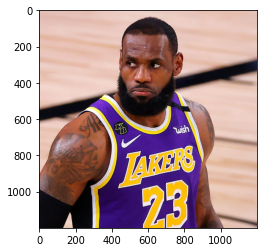

In [2]:
img_path = r'D:\Style-Transfer\Webscrape\dataset\images\content_images\players\lebron1.jpg'
img_arr = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
plt.imshow(img_arr[...,::-1])    # cv keeps the images in BGR
plt.show()

### Resize Image 

Original size (1200, 1200, 3)
RESIZED (224, 224, 3)


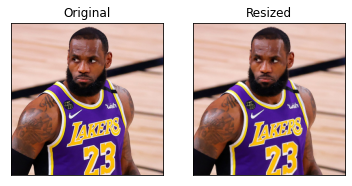

In [3]:
# Display two images
def display_two(a, b, title1 = "Original", title2 = "Resized"):
    plt.subplot(121), plt.imshow(a[...,::-1]), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b[...,::-1]), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
    
# Preprocessing
def processing(img):

    #print(img)
    print('Original size',img.shape)
    # setting dimensions of the resize
    height = 224
    width = 224
    dimension = (width, height)
    
    resized = cv2.resize(img,dimension,interpolation=cv2.INTER_AREA)
    # Checcking the size
    print("RESIZED", resized.shape)
    #print(img)
    # Visualization of original and resized image
    display_two(img,resized)
    
    #print(resized)
    
processing(img_arr)

### Remove Noise 

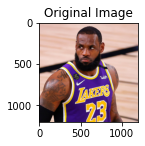

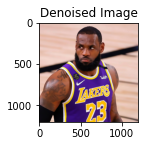

In [8]:
img = cv2.imread(img_path)
w = img.shape[0]
h = img.shape[1]
#print(w,h)

b,g,r = cv2.split(img)           # get b,g,r

rgb_img = cv2.merge([r,g,b])     # switch it to rgb

# Denoising
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

b,g,r = cv2.split(dst)           # get b,g,r

rgb_dst = cv2.merge([r,g,b])     # switch it to rgb

plt.subplot(211),plt.imshow(rgb_img),plt.title('Original Image')
plt.show()
plt.subplot(212),plt.imshow(rgb_dst),plt.title('Denoised Image')
plt.show()